/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = cl

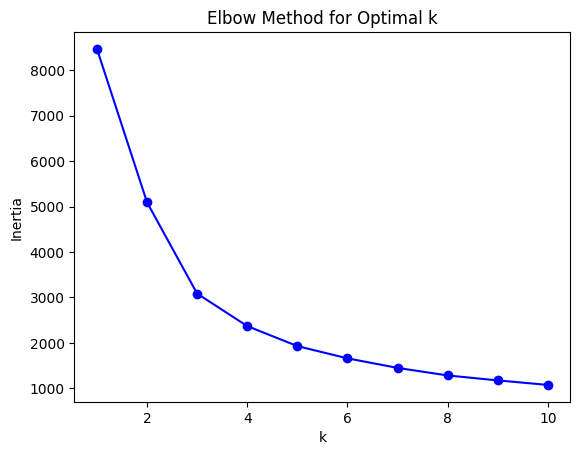


Cluster Centers (Mean of each feature per cluster):
         QUANTITYORDERED  PRICEEACH        SALES
Cluster                                         
0              35.125993  57.130216  2009.829955
1              43.847850  96.637795  5584.007299
2              27.392271  94.865575  3089.153662


/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sanskar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = cl

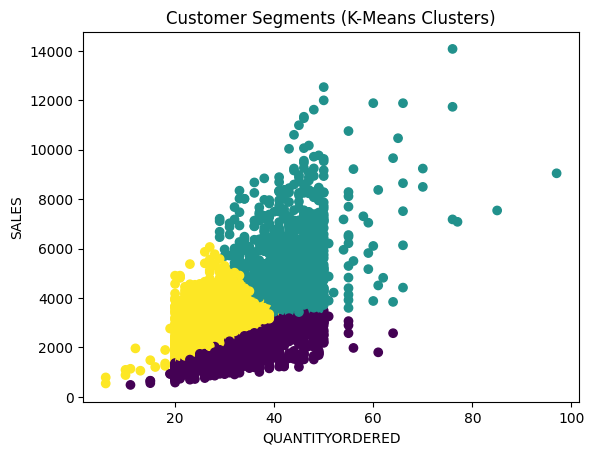

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1️⃣ Read dataset with correct encoding
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# 2️⃣ Select numeric columns for clustering
data = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].dropna()

# 3️⃣ Normalize
scaler = StandardScaler()
X = scaler.fit_transform(data)

# 4️⃣ Elbow method
inertias = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 5️⃣ Final clustering
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
data['Cluster'] = labels

print("\nCluster Centers (Mean of each feature per cluster):")
print(data.groupby('Cluster').mean())

# Optional: Visualize clusters
plt.scatter(data['QUANTITYORDERED'], data['SALES'], c=data['Cluster'], cmap='viridis')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.title('Customer Segments (K-Means Clusters)')
plt.show()
